# What are the crime rates against sc and other backward classes in different states of India

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df=pd.read_csv("data\crime_by_state_rt.csv").copy()
df

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,2001,45,69,22,3,2,6,518,950,312,1006
1,ANDHRA PRADESH,2002,60,98,18,0,4,12,568,830,459,1336
2,ANDHRA PRADESH,2003,33,79,27,1,15,4,615,1234,165,1386
3,ANDHRA PRADESH,2004,39,66,28,0,7,20,474,1319,68,1234
4,ANDHRA PRADESH,2005,37,74,21,0,0,9,459,1244,61,1212
...,...,...,...,...,...,...,...,...,...,...,...,...
415,PUDUCHERRY,2008,0,0,0,0,0,0,0,2,27,0
416,PUDUCHERRY,2009,0,0,0,0,0,0,0,3,26,0
417,PUDUCHERRY,2010,1,0,1,0,0,0,1,2,26,0
418,PUDUCHERRY,2011,0,0,0,0,0,0,0,1,15,2


In [9]:
df.shape

(420, 12)

In [10]:
df.isnull().sum() # nice we don't have to deal with any null values

STATE/UT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              420 non-null    object
 1   Year                                  420 non-null    int64 
 2   Murder                                420 non-null    int64 
 3   Assault on women                      420 non-null    int64 
 4   Kidnapping and Abduction              420 non-null    int64 
 5   Dacoity                               420 non-null    int64 
 6   Robbery                               420 non-null    int64 
 7   Arson                                 420 non-null    int64 
 8   Hurt                                  420 non-null    int64 
 9   Prevention of atrocities (POA) Act    420 non-null    int64 
 10  Protection of Civil Rights (PCR) Act  420 non-null    int64 
 11  Other Crimes Against SCs        

## EDA

In [13]:
states=df['STATE/UT'].value_counts().keys()
states

Index(['ANDHRA PRADESH', 'UTTARAKHAND', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'WEST BENGAL', 'NAGALAND',
       'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI',
       'LAKSHADWEEP', 'ODISHA', 'MIZORAM', 'ARUNACHAL PRADESH',
       'HIMACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'GOA', 'GUJARAT',
       'HARYANA', 'JAMMU & KASHMIR', 'MEGHALAYA', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'PUDUCHERRY'],
      dtype='object')

In [18]:
df.columns
col=[]
for i in df.columns:
    if (i !='STATE/UT') & (i!='Prevention of atrocities (POA) Act') & (i!='Protection of Civil Rights (PCR) Act')&(i!='Year'):
        col.append(i)
col

['Murder',
 'Assault on women',
 'Kidnapping and Abduction',
 'Dacoity',
 'Robbery',
 'Arson',
 'Hurt',
 'Other Crimes Against SCs']

In [20]:
# Now making a final Dictionary for which will contain crimes related to each state
Ans={}
for i in states:
    temp=df[df['STATE/UT']==i]
    dic={}
    for k in col:
        dic[k]=temp[k].sum()
    Ans[i]=dic
Ans        

{'ANDHRA PRADESH': {'Murder': 556,
  'Assault on women': 1110,
  'Kidnapping and Abduction': 238,
  'Dacoity': 9,
  'Robbery': 39,
  'Arson': 136,
  'Hurt': 7248,
  'Other Crimes Against SCs': 17412},
 'UTTARAKHAND': {'Murder': 50,
  'Assault on women': 65,
  'Kidnapping and Abduction': 27,
  'Dacoity': 0,
  'Robbery': 1,
  'Arson': 4,
  'Hurt': 160,
  'Other Crimes Against SCs': 45},
 'PUNJAB': {'Murder': 32,
  'Assault on women': 115,
  'Kidnapping and Abduction': 18,
  'Dacoity': 0,
  'Robbery': 1,
  'Arson': 0,
  'Hurt': 134,
  'Other Crimes Against SCs': 502},
 'RAJASTHAN': {'Murder': 630,
  'Assault on women': 1909,
  'Kidnapping and Abduction': 365,
  'Dacoity': 1,
  'Robbery': 33,
  'Arson': 481,
  'Hurt': 5984,
  'Other Crimes Against SCs': 37653},
 'SIKKIM': {'Murder': 8,
  'Assault on women': 17,
  'Kidnapping and Abduction': 8,
  'Dacoity': 0,
  'Robbery': 4,
  'Arson': 2,
  'Hurt': 39,
  'Other Crimes Against SCs': 18},
 'TAMIL NADU': {'Murder': 352,
  'Assault on women': 

In [22]:
df['Total crimes']=(df['Murder'])+(df['Assault on women'])+(df['Kidnapping and Abduction'])+(df['Dacoity'])+(df['Robbery'])+(df['Arson'])+(df['Hurt'])+(df['Other Crimes Against SCs'])
df

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total crimes
0,ANDHRA PRADESH,2001,45,69,22,3,2,6,518,950,312,1006,1671
1,ANDHRA PRADESH,2002,60,98,18,0,4,12,568,830,459,1336,2096
2,ANDHRA PRADESH,2003,33,79,27,1,15,4,615,1234,165,1386,2160
3,ANDHRA PRADESH,2004,39,66,28,0,7,20,474,1319,68,1234,1868
4,ANDHRA PRADESH,2005,37,74,21,0,0,9,459,1244,61,1212,1812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,PUDUCHERRY,2008,0,0,0,0,0,0,0,2,27,0,0
416,PUDUCHERRY,2009,0,0,0,0,0,0,0,3,26,0,0
417,PUDUCHERRY,2010,1,0,1,0,0,0,1,2,26,0,3
418,PUDUCHERRY,2011,0,0,0,0,0,0,0,1,15,2,2


In [47]:
# Total crimes for each state
total={}
for i in states:
    temp=df[df['STATE/UT']==i]
    total[i]=temp['Total crimes'].sum()
total

{'ANDHRA PRADESH': 26748,
 'UTTARAKHAND': 352,
 'PUNJAB': 802,
 'RAJASTHAN': 47056,
 'SIKKIM': 96,
 'TAMIL NADU': 7278,
 'TRIPURA': 175,
 'UTTAR PRADESH': 49594,
 'WEST BENGAL': 197,
 'NAGALAND': 50,
 'A & N ISLANDS': 0,
 'CHANDIGARH': 6,
 'D & N HAVELI': 7,
 'DAMAN & DIU': 5,
 'DELHI': 11,
 'LAKSHADWEEP': 0,
 'ODISHA': 8677,
 'MIZORAM': 2,
 'ARUNACHAL PRADESH': 2,
 'HIMACHAL PRADESH': 460,
 'ASSAM': 941,
 'BIHAR': 9450,
 'CHHATTISGARH': 4267,
 'GOA': 15,
 'GUJARAT': 9914,
 'HARYANA': 2511,
 'JAMMU & KASHMIR': 30,
 'MEGHALAYA': 0,
 'JHARKHAND': 2697,
 'KARNATAKA': 10151,
 'KERALA': 5130,
 'MADHYA PRADESH': 46944,
 'MAHARASHTRA': 7821,
 'MANIPUR': 0,
 'PUDUCHERRY': 17}

In [48]:
total=dict(sorted(total.items(), key=lambda item: item[1]))
total

{'A & N ISLANDS': 0,
 'LAKSHADWEEP': 0,
 'MEGHALAYA': 0,
 'MANIPUR': 0,
 'MIZORAM': 2,
 'ARUNACHAL PRADESH': 2,
 'DAMAN & DIU': 5,
 'CHANDIGARH': 6,
 'D & N HAVELI': 7,
 'DELHI': 11,
 'GOA': 15,
 'PUDUCHERRY': 17,
 'JAMMU & KASHMIR': 30,
 'NAGALAND': 50,
 'SIKKIM': 96,
 'TRIPURA': 175,
 'WEST BENGAL': 197,
 'UTTARAKHAND': 352,
 'HIMACHAL PRADESH': 460,
 'PUNJAB': 802,
 'ASSAM': 941,
 'HARYANA': 2511,
 'JHARKHAND': 2697,
 'CHHATTISGARH': 4267,
 'KERALA': 5130,
 'TAMIL NADU': 7278,
 'MAHARASHTRA': 7821,
 'ODISHA': 8677,
 'BIHAR': 9450,
 'GUJARAT': 9914,
 'KARNATAKA': 10151,
 'ANDHRA PRADESH': 26748,
 'MADHYA PRADESH': 46944,
 'RAJASTHAN': 47056,
 'UTTAR PRADESH': 49594}

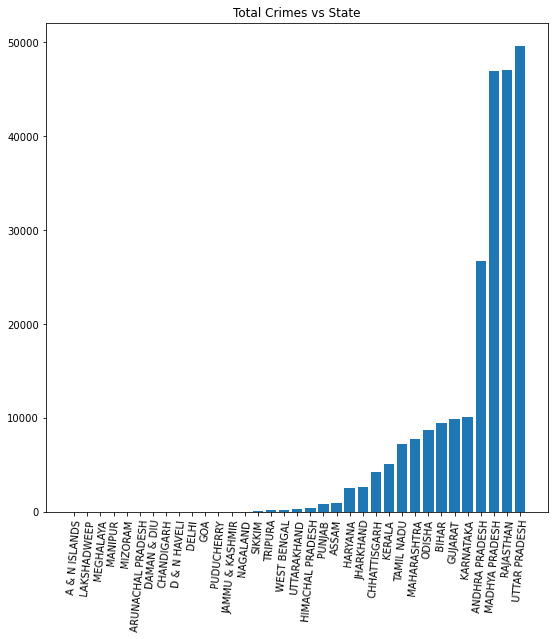

In [49]:
plt.figure(figsize=(9,9))
plt.bar(total.keys(),total.values())
plt.xticks(rotation=85)
plt.title('Total Crimes vs State')
plt.show()

# Observation 1 - Uttar Pradesh , Rajasthan , MP ,Andhra Pradesh ,Karnataka are the top 5 cities with most no of crimes against Backward Classes
# Mizoram,Manipur,Meghalaya Lakshadweep are some states with almost zero crimes agnaist Backward Classes

In [50]:
women={}
for i in states:
    temp=df[df['STATE/UT']==i]
    women[i]=temp['Assault on women'].sum()
women

{'ANDHRA PRADESH': 1110,
 'UTTARAKHAND': 65,
 'PUNJAB': 115,
 'RAJASTHAN': 1909,
 'SIKKIM': 17,
 'TAMIL NADU': 259,
 'TRIPURA': 15,
 'UTTAR PRADESH': 3625,
 'WEST BENGAL': 19,
 'NAGALAND': 6,
 'A & N ISLANDS': 0,
 'CHANDIGARH': 2,
 'D & N HAVELI': 0,
 'DAMAN & DIU': 0,
 'DELHI': 0,
 'LAKSHADWEEP': 0,
 'ODISHA': 574,
 'MIZORAM': 0,
 'ARUNACHAL PRADESH': 0,
 'HIMACHAL PRADESH': 93,
 'ASSAM': 57,
 'BIHAR': 284,
 'CHHATTISGARH': 661,
 'GOA': 1,
 'GUJARAT': 325,
 'HARYANA': 447,
 'JAMMU & KASHMIR': 7,
 'MEGHALAYA': 0,
 'JHARKHAND': 129,
 'KARNATAKA': 329,
 'KERALA': 782,
 'MADHYA PRADESH': 4107,
 'MAHARASHTRA': 979,
 'MANIPUR': 0,
 'PUDUCHERRY': 0}

In [55]:
women=dict(sorted(women.items(), key=lambda item: item[1]))
women

{'A & N ISLANDS': 0,
 'D & N HAVELI': 0,
 'DAMAN & DIU': 0,
 'DELHI': 0,
 'LAKSHADWEEP': 0,
 'MIZORAM': 0,
 'ARUNACHAL PRADESH': 0,
 'MEGHALAYA': 0,
 'MANIPUR': 0,
 'PUDUCHERRY': 0,
 'GOA': 1,
 'CHANDIGARH': 2,
 'NAGALAND': 6,
 'JAMMU & KASHMIR': 7,
 'TRIPURA': 15,
 'SIKKIM': 17,
 'WEST BENGAL': 19,
 'ASSAM': 57,
 'UTTARAKHAND': 65,
 'HIMACHAL PRADESH': 93,
 'PUNJAB': 115,
 'JHARKHAND': 129,
 'TAMIL NADU': 259,
 'BIHAR': 284,
 'GUJARAT': 325,
 'KARNATAKA': 329,
 'HARYANA': 447,
 'ODISHA': 574,
 'CHHATTISGARH': 661,
 'KERALA': 782,
 'MAHARASHTRA': 979,
 'ANDHRA PRADESH': 1110,
 'RAJASTHAN': 1909,
 'UTTAR PRADESH': 3625,
 'MADHYA PRADESH': 4107}

In [67]:
women1=list(women.keys())[-6:-1]
women2=list(women.values())[-6:-1]

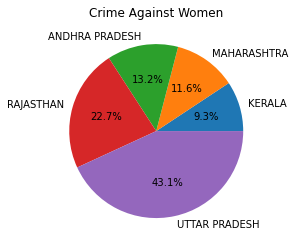

In [72]:
plt.pie(women2,labels=women1,autopct='%.1f%%')
plt.title('Crime Against Women')
plt.show()

# Observation 2- We can see the top 5 states with most crimes against women

In [76]:
year=list(df['Year'].unique())
year

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

In [91]:
year_total={}
for i in year:
    temp=df[df['Year']==i]
    year_total[str(i)]=temp['Total crimes'].sum()
year_total

{'2001': 19755,
 '2002': 21719,
 '2003': 17570,
 '2004': 17632,
 '2005': 17339,
 '2006': 18084,
 '2007': 20006,
 '2008': 21686,
 '2009': 22207,
 '2010': 22081,
 '2011': 22310,
 '2012': 21017}

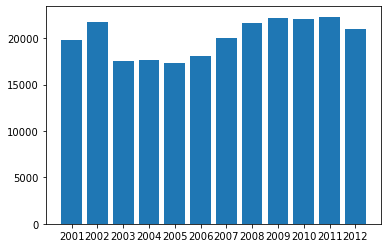

In [95]:
plt.bar(year_total.keys(),year_total.values())
plt.show()

# Observation 3 - Crimes against Backward classes decreased from 2001 to 2003 and remained still for 4 years till 2006
# But from 2006 crimes significantly increased